In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.spatial import distance
from itertools import combinations
np.random.seed(52)

In [3]:
a = np.random.randint(1, 5, size=(5,3))
b = np.random.randint(6, 10, size=(5,3))
dataset = np.vstack((a, b))


In [4]:
# calculating euclidean distances
similarity_distance = distance.pdist(dataset, 'euclidean')
med = np.median(similarity_distance)
gauss_kernel_simi = np.exp(-np.square(similarity_distance)/(2*np.square(med)))

In [5]:
#creating adjacency matrices
adj_matrix = np.zeros((dataset.shape[0], dataset.shape[0]))
indices = list(combinations(range(dataset.shape[0]), 2))
assert len(list(indices)) == len(gauss_kernel_simi)

for i in range(len(gauss_kernel_simi)):
    adj_matrix[indices[i][0], indices[i][1]] = gauss_kernel_simi[i]
    adj_matrix[indices[i][1], indices[i][0]] = gauss_kernel_simi[i]
    indices[i] = indices[i] + (float(gauss_kernel_simi[i]), )

adj_matrix


array([[0.        , 0.90483742, 0.82695913, 0.96078944, 0.92311635,
        0.33287108, 0.4965853 , 0.43171052, 0.36421898, 0.42316208],
       [0.90483742, 0.        , 0.95122942, 0.98019867, 0.94176453,
        0.39062784, 0.60653066, 0.60653066, 0.46301307, 0.4965853 ],
       [0.82695913, 0.95122942, 0.        , 0.89583414, 0.82695913,
        0.25410696, 0.44485807, 0.47236655, 0.31981902, 0.33621649],
       [0.96078944, 0.98019867, 0.89583414, 0.        , 0.96078944,
        0.40656966, 0.60653066, 0.57120906, 0.46301307, 0.51685133],
       [0.92311635, 0.94176453, 0.82695913, 0.96078944, 0.        ,
        0.51685133, 0.71177032, 0.64403642, 0.56552544, 0.60653066],
       [0.33287108, 0.39062784, 0.25410696, 0.40656966, 0.51685133,
        0.        , 0.92311635, 0.8025188 , 0.97044553, 0.96078944],
       [0.4965853 , 0.60653066, 0.44485807, 0.60653066, 0.71177032,
        0.92311635, 0.        , 0.94176453, 0.97044553, 0.96078944],
       [0.43171052, 0.60653066, 0.4723665

In [6]:
#Create a degree matrix
degree_matrix = np.diag(np.sum(adj_matrix, axis=1))
degree_matrix

array([[5.66425031, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 6.34131758, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 5.32834892, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 6.36178547, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 6.69734363,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        5.55789699, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 6.66239086, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

In [7]:
#create a laplacian matrix L = Degree - Adjacency
lap_mat = degree_matrix - adj_matrix
eig_val, eig_vec = np.linalg.eigh(lap_mat)
eig_val, eig_vec = np.argsort(eig_val), eig_vec[np.argsort(eig_val)]
fiedler_vector = eig_vec[:, 1]

{0: Text(0.00896044796585871, -0.1297873884832481, '0'),
 1: Text(0.10510676165420711, 0.09470457513385595, '1'),
 2: Text(-0.26532266239425517, 0.5518649646292977, '2'),
 3: Text(-0.2646426236786479, 0.0006634855325244045, '3'),
 4: Text(-0.08110646543449374, 0.2832088709791698, '4'),
 5: Text(0.414250541774872, 0.1686857569642832, '5'),
 6: Text(0.32893406382532114, -0.3641401109512278, '6'),
 7: Text(-0.5105702676170006, -0.1162342056215455, '7'),
 8: Text(0.535473967106115, 0.5110340518168925, '8'),
 9: Text(-0.2710837632019765, -1.0, '9')}

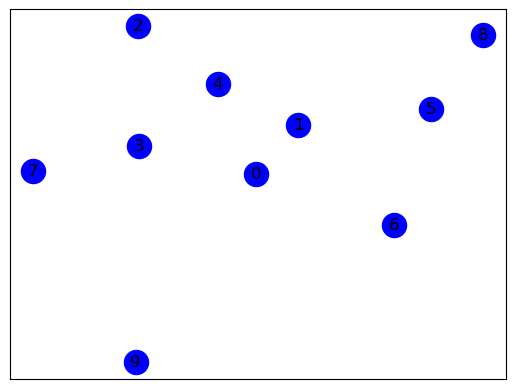

In [25]:
g = nx.DiGraph()
g.add_weighted_edges_from(indices)
weights = [g[u][v]['weight'] for u,v in g.edges()]
pos_weighted = nx.spring_layout(g, weight='weight', iterations=100)
nx.draw_networkx_nodes(g, pos_weighted, node_color="blue")
# nx.draw_networkx_edges(g, pos_weighted, width=weights, edge_color="green")
nx.draw_networkx_labels(g, pos_weighted, font_color="black")

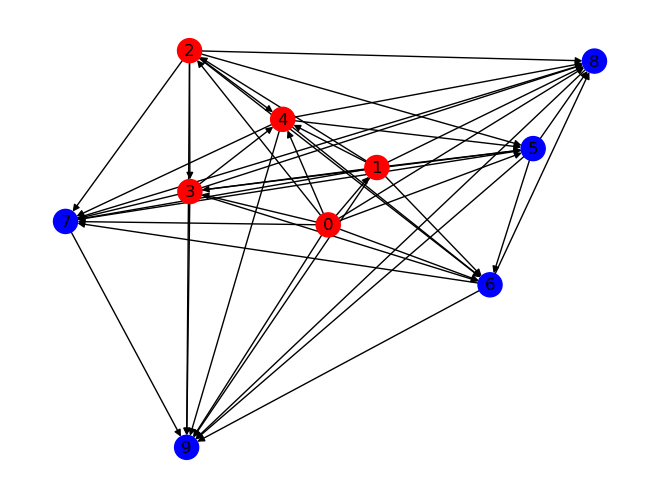

In [26]:
fiedler_vector_med = np.median(fiedler_vector)
clusters = np.where(fiedler_vector > fiedler_vector_med, 1, 0)
colors = ["red" if cluster == 0 else "blue" for cluster in clusters]
nx.draw(g, pos_weighted, node_color=colors, with_labels=True)